<div style="direction:rtl">
    
# پیاده سازی شبکه عصبی به کمک Tensorflow 

## ملیکا مرافق 810197581



# مقدمه 
در این پروژه قصد داریم با کتابخانه TensorFlow و با استفاده از رابط  Keras برخی از مسائل مربوط به شبکه های عصبی را بررسی نماییم.  


# توضیح پروژه

در این مسئله قصد داریم با استفاده از شبکه های عصبی وجود بیماری Covid19 یا ذات الریه را در تصاویر سیتی اسکن مربوط به بیماران را تشخیص دهیم.  
</div>

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!cp "/content/gdrive/MyDrive/xray.zip" .

In [5]:
!unzip xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

In [6]:
from sklearn.metrics import classification_report
from tensorflow.keras import *
import matplotlib.pyplot as plt
import numpy as np
import math


In [7]:
dataGenerator = preprocessing.image.ImageDataGenerator()


In [ ]:
trainData = dataGenerator.flow_from_directory("/content/Data/train",
                                              target_size = (80,80),
                                              color_mode='grayscale',
                                              batch_size = 32)

Found 5144 images belonging to 3 classes.


# 2

[0 1 2] [5 1 0]


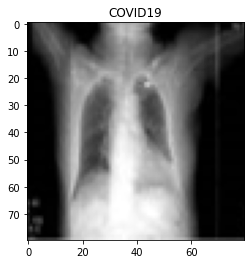

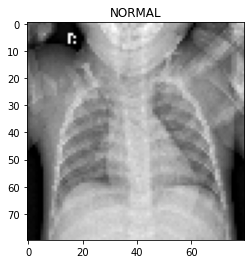

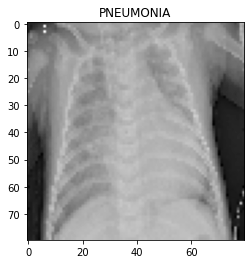

In [ ]:
x,y = trainData.next()
m = y.argmax(axis =1)
u, indices = np.unique(m, return_index=True)
classes = list(trainData.class_indices.keys())
for i in range(3):
    image = x[indices[i]]
    plt.title(classes[i])
    plt.imshow(image.reshape(80,-1),cmap='gray')
    plt.show()

In [ ]:
testData = dataGenerator.flow_from_directory("/content/Data/test",
                                              target_size = (80,80),
                                              color_mode='grayscale',
                                              batch_size = 32)

Found 1288 images belonging to 3 classes.


(array([ 460.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1266.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 3418.]),
 array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
        1.11111111, 1.22222222, 1.33333333, 1.44444444, 1.55555556,
        1.66666667, 1.77777778, 1.88888889, 2.        ]),
 <a list of 18 Patch objects>)

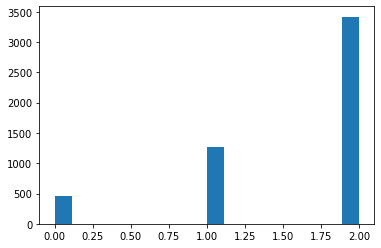

In [ ]:
plt.hist(trainData.labels,bins= 'auto')

In [10]:
def plotHistory(history):
  
  print(history.history.keys())

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [11]:
def getTrueLabels(data,model):
  num_batch = math.ceil(len(data.classes) / 32)
  x,y = data.next()
  labels = np.argmax(y,axis = 1)
  pred = np.argmax(model.predict(x),axis =1)
  for i in range(1,num_batch):
    x,y = data.next()
    y_pred = model.predict(x)
    pred = np.concatenate((pred,np.argmax(y_pred,axis=1)),axis = None)
    labels = np.concatenate((labels,np.argmax(y,axis=1)),axis = None)
  return pred,labels
  
#getTrueLabels(trainData)

# 3

In [ ]:
input = layers.Input(shape = (80,80,1))
out = layers.Flatten()(input)
out = layers.Dense(1024,activation="relu")(out)
out = layers.Dense(1024,activation="relu")(out)
out = layers.Dense(3,activation="softmax")(out)
relu_model = models.Model(inputs=input , outputs=out)

In [ ]:
relu_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6554624   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


تعداد پارامتر ها در هر لایه برابر مجموع تعداد درایه های ماتریس وزن و بایاس است.

6400 * 1024 + 1024 = 6554624

1024 * 1024 + 1024 = 1049600

1024 * 3 + 3 = 3075


# 4

In [ ]:
relu_model.compile(optimizer=optimizers.SGD(learning_rate=0.01),loss="categorical_crossentropy",metrics=['accuracy'])
relu_history = relu_model.fit(trainData,validation_data=testData,epochs=10)

Epoch 1/10
161/161 [==============================] - 146s 899ms/step - loss: nan - accuracy: 0.1463 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 144s 899ms/step - loss: nan - accuracy: 0.0807 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 144s 895ms/step - loss: nan - accuracy: 0.0887 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 144s 896ms/step - loss: nan - accuracy: 0.0946 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 144s 897ms/step - loss: nan - accuracy: 0.0884 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
 30/161 [====>.........................] - ETA: 1:39 - loss: nan - accuracy: 0.0860

In [ ]:
pred , expected = getTrueLabels(testData,relu_model)
print(classification_report(expected,pred))

              precision    recall  f1-score   support

           0       0.09      1.00      0.17       116
           1       0.00      0.00      0.00       317
           2       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288



In [ ]:
plotHistory(relu_history)

NameError: ignored

<div style="direction:rtl">
از آنجاییکه داده ها بین 0 تا 255 هستند پس از ضرب های متوالی در backpropagation (chain rule) دچار overflow میشویم.( exploding gradient )گرادیان ها nan می شوند وزن ها و بایاس آپدیت نمی شوند.
    </div>

In [ ]:
input = layers.Input(shape = (80,80,1))
out = layers.Flatten()(input)
out = layers.Dense(1024,activation="tanh")(out)
out = layers.Dense(1024,activation="tanh")(out)
out = layers.Dense(3,activation="softmax")(out)
tanh_model = models.Model(inputs=input , outputs=out)

In [ ]:
tanh_model.compile(optimizer=optimizers.SGD(learning_rate=0.01),loss="categorical_crossentropy",metrics=['accuracy'])
tanh_history = tanh_model.fit(trainData,validation_data=testData,epochs=10)

Epoch 1/10
161/161 [==============================] - 144s 891ms/step - loss: 0.8650 - accuracy: 0.6524 - val_loss: 0.8607 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 142s 884ms/step - loss: 0.8698 - accuracy: 0.6449 - val_loss: 0.9389 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 142s 885ms/step - loss: 0.8780 - accuracy: 0.6414 - val_loss: 0.8503 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 142s 883ms/step - loss: 0.8665 - accuracy: 0.6625 - val_loss: 0.9155 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 141s 878ms/step - loss: 0.8643 - accuracy: 0.6422 - val_loss: 0.8517 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 140s 871ms/step - loss: 0.8536 - accuracy: 0.6662 - val_loss: 0.8595 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 141s 878ms/step - loss: 0.8498 - accuracy: 0.6637 - val_loss: 0.8402 -

In [ ]:
pred , expected = getTrueLabels(testData,tanh_model)
print(classification_report(expected,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


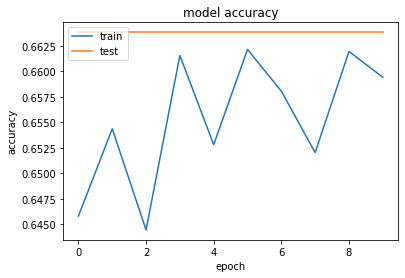

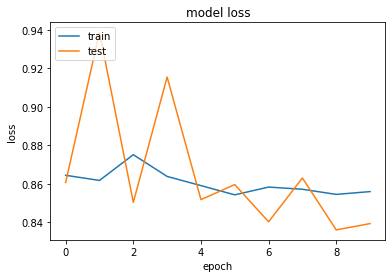

In [ ]:
plotHistory(tanh_history)

<div style="direction:rtl">
    
تمامی داده های تست را عضو کلاس 2 پیش بینی کرده ایم. دقت در داده ی تست ثابت و برابر فراوانی کلاس 2 است . 
از آنجاییکه خروجی تابع tanh کوچکتر از 1 بوده ( مشتق آنها نیز همین طور )در زنجیره ی گرادیان ها برای به روزرسانی وزن ها ،با ضرب گرادیان ها این مقدار کوچک و کوچکترشده و فرآیند آموزش بسیار کند می شود.(vanishing gradients problem)
</div>

<div style="direction:rtl">
شباهت هر دو این است که گرادیان ها از بین می روند و نمی توانند در به روز رسانی وزن ها تاثیر بگذارند.برای حل مشکل relu  میتوان داده ها را نرمال کنیم تا دچار overflow نشویم.
  </div>

# 5

In [8]:
dataGenerator = preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
trainData = dataGenerator.flow_from_directory("/content/Data/train",
                                              target_size = (80,80),
                                              color_mode='grayscale',       
                                              batch_size = 32)

Found 5144 images belonging to 3 classes.


In [9]:
dataGenerator = preprocessing.image.ImageDataGenerator(rescale=1/255.0)
testData = dataGenerator.flow_from_directory("/content/Data/test",
                                              target_size = (80,80),
                                              color_mode='grayscale',       
                                              batch_size = 32)

Found 1288 images belonging to 3 classes.


In [ ]:
input = layers.Input(shape = (80,80,1))
out = layers.Flatten()(input)
out = layers.Dense(1024,activation="relu")(out)
out = layers.Dense(1024,activation="relu")(out)
out = layers.Dense(3,activation="softmax")(out)

model = models.Model(inputs=input , outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01),loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit(trainData,validation_data=testData,epochs=10)

Epoch 1/10
161/161 [==============================] - 172s 1s/step - loss: 0.6842 - accuracy: 0.7112 - val_loss: 0.2901 - val_accuracy: 0.9123
Epoch 2/10
161/161 [==============================] - 170s 1s/step - loss: 0.3935 - accuracy: 0.8515 - val_loss: 0.3266 - val_accuracy: 0.8758
Epoch 3/10
161/161 [==============================] - 170s 1s/step - loss: 0.3176 - accuracy: 0.8775 - val_loss: 0.2582 - val_accuracy: 0.9022
Epoch 4/10
161/161 [==============================] - 168s 1s/step - loss: 0.2773 - accuracy: 0.8990 - val_loss: 0.3161 - val_accuracy: 0.8773
Epoch 5/10
161/161 [==============================] - 168s 1s/step - loss: 0.2893 - accuracy: 0.8863 - val_loss: 0.1957 - val_accuracy: 0.9255
Epoch 6/10
161/161 [==============================] - 169s 1s/step - loss: 0.2667 - accuracy: 0.9024 - val_loss: 0.2581 - val_accuracy: 0.9014
Epoch 7/10
161/161 [==============================] - 171s 1s/step - loss: 0.2593 - accuracy: 0.9012 - val_loss: 0.2151 - val_accuracy: 0.9146

In [ ]:
pred , expected = getTrueLabels(testData,model)
print(classification_report(expected,pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       116
           1       0.91      0.90      0.90       317
           2       0.95      0.97      0.96       855

    accuracy                           0.94      1288
   macro avg       0.94      0.92      0.93      1288
weighted avg       0.94      0.94      0.94      1288



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


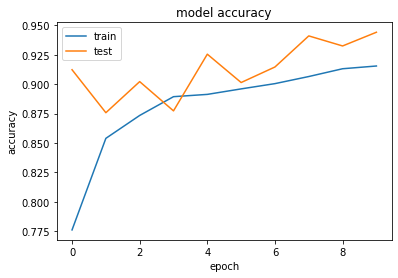

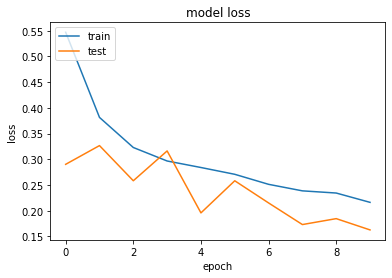

In [ ]:
plotHistory(history)

In [ ]:
input = layers.Input(shape = (80,80,1))
out = layers.Flatten()(input)
out = layers.Dense(4096,activation="relu")(out)
out = layers.Dense(2048,activation="relu")(out)
out = layers.Dense(1024,activation="relu")(out)
out = layers.Dense(3,activation="softmax")(out)

model = models.Model(inputs=input , outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01),loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit(trainData,validation_data=testData,epochs=10)

Epoch 1/10
161/161 [==============================] - 145s 898ms/step - loss: 0.6803 - accuracy: 0.7124 - val_loss: 0.3456 - val_accuracy: 0.8975
Epoch 2/10
161/161 [==============================] - 143s 888ms/step - loss: 0.3840 - accuracy: 0.8463 - val_loss: 0.2927 - val_accuracy: 0.8936
Epoch 3/10
161/161 [==============================] - 143s 891ms/step - loss: 0.2895 - accuracy: 0.8849 - val_loss: 0.2361 - val_accuracy: 0.9154
Epoch 4/10
161/161 [==============================] - 143s 887ms/step - loss: 0.2870 - accuracy: 0.8858 - val_loss: 0.3364 - val_accuracy: 0.8626
Epoch 5/10
161/161 [==============================] - 143s 891ms/step - loss: 0.2596 - accuracy: 0.8970 - val_loss: 0.3552 - val_accuracy: 0.8626
Epoch 6/10
161/161 [==============================] - 142s 886ms/step - loss: 0.2661 - accuracy: 0.8983 - val_loss: 0.3553 - val_accuracy: 0.8602
Epoch 7/10
161/161 [==============================] - 143s 892ms/step - loss: 0.2290 - accuracy: 0.9166 - val_loss: 0.1942 -

In [ ]:
pred , expected = getTrueLabels(testData,model)
print(classification_report(expected,pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       116
           1       0.90      0.92      0.91       317
           2       0.96      0.97      0.96       855

    accuracy                           0.95      1288
   macro avg       0.94      0.92      0.93      1288
weighted avg       0.95      0.95      0.95      1288



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


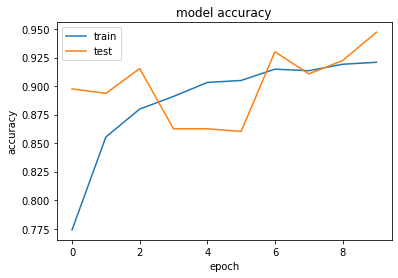

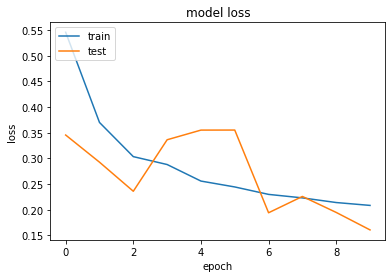

In [ ]:
plotHistory(history)

# 6

<div style="direction:rtl">

یک exponentially weighted average از گرادیان ها محاسبه می کند و از آن برای آپدیت کردن وزن ها استفاده می کند. به طوریکه به data point های اخیر وزن بیشتری می دهد . اگر momentum برابر b باشد انگار بر روی (1/1+b-) میانگین می گیریم.یعنی اگر برابر 0.5 باشد 2 datapoint اگر 0.9 باشد 10 ...
معمولا مقدار 0.9 بهتر نتیجه می گیرد.

به طور کلی باعث افزایش سرعت می شود و میتواند گرادیان های دارای نویز را هندل کند.
</div>


## momentum = 0.5

In [ ]:
input = layers.Input(shape = (80,80,1))
out = layers.Flatten()(input)
out = layers.Dense(4096,activation="relu")(out)
out = layers.Dense(2048,activation="relu")(out)
out = layers.Dense(1024,activation="relu")(out)
out = layers.Dense(3,activation="softmax")(out)

model6= models.Model(inputs=input , outputs=out)
model6.compile(optimizer=optimizers.SGD(learning_rate=0.01,momentum = 0.5),loss="categorical_crossentropy",metrics=['accuracy'])
history6 = model6.fit(trainData,validation_data=testData,epochs=10)

Epoch 1/10
161/161 [==============================] - 145s 901ms/step - loss: 0.6984 - accuracy: 0.7108 - val_loss: 0.3428 - val_accuracy: 0.8634
Epoch 2/10
161/161 [==============================] - 144s 890ms/step - loss: 0.3393 - accuracy: 0.8642 - val_loss: 0.2131 - val_accuracy: 0.9270
Epoch 3/10
161/161 [==============================] - 144s 897ms/step - loss: 0.2656 - accuracy: 0.8995 - val_loss: 0.2560 - val_accuracy: 0.9084
Epoch 4/10
161/161 [==============================] - 145s 898ms/step - loss: 0.2552 - accuracy: 0.9055 - val_loss: 0.2191 - val_accuracy: 0.9193
Epoch 5/10
161/161 [==============================] - 145s 893ms/step - loss: 0.2437 - accuracy: 0.9030 - val_loss: 0.2128 - val_accuracy: 0.9138
Epoch 6/10
161/161 [==============================] - 145s 901ms/step - loss: 0.2216 - accuracy: 0.9119 - val_loss: 0.1992 - val_accuracy: 0.9231
Epoch 7/10
161/161 [==============================] - 145s 899ms/step - loss: 0.2310 - accuracy: 0.9161 - val_loss: 0.1788 -

In [ ]:
pred , expected = getTrueLabels(testData,model6)
print(classification_report(expected,pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       116
           1       0.93      0.85      0.88       311
           2       0.93      0.98      0.96       861

    accuracy                           0.93      1288
   macro avg       0.95      0.88      0.91      1288
weighted avg       0.94      0.93      0.93      1288



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


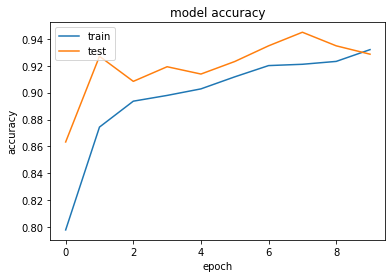

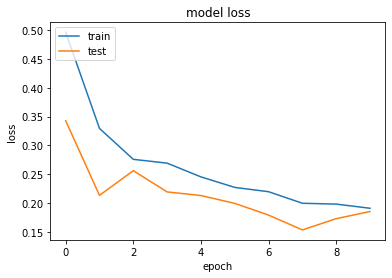

In [ ]:
plotHistory(history6)

## momentum = 0.9

In [ ]:
input = layers.Input(shape = (80,80,1))
out = layers.Flatten()(input)
out = layers.Dense(4096,activation="relu")(out)
out = layers.Dense(2048,activation="relu")(out)
out = layers.Dense(1024,activation="relu")(out)
out = layers.Dense(3,activation="softmax")(out)

model= models.Model(inputs=input , outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01,momentum = 0.9),loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit(trainData,validation_data=testData,epochs=10)

Epoch 1/10
161/161 [==============================] - 158s 972ms/step - loss: 0.6598 - accuracy: 0.7280 - val_loss: 0.2084 - val_accuracy: 0.9247
Epoch 2/10
161/161 [==============================] - 155s 966ms/step - loss: 0.3295 - accuracy: 0.8725 - val_loss: 0.2069 - val_accuracy: 0.9239
Epoch 3/10
161/161 [==============================] - 155s 966ms/step - loss: 0.2601 - accuracy: 0.9042 - val_loss: 0.3243 - val_accuracy: 0.8509
Epoch 4/10
161/161 [==============================] - 156s 967ms/step - loss: 0.2846 - accuracy: 0.8860 - val_loss: 0.2897 - val_accuracy: 0.9068
Epoch 5/10
161/161 [==============================] - 156s 970ms/step - loss: 0.2906 - accuracy: 0.8893 - val_loss: 0.1938 - val_accuracy: 0.9348
Epoch 6/10
161/161 [==============================] - 156s 969ms/step - loss: 0.2527 - accuracy: 0.9113 - val_loss: 0.1632 - val_accuracy: 0.9457
Epoch 7/10
161/161 [==============================] - 156s 971ms/step - loss: 0.2288 - accuracy: 0.9132 - val_loss: 0.1874 -

In [ ]:
pred , expected = getTrueLabels(testData,model)
print(classification_report(expected,pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       116
           1       0.91      0.93      0.92       317
           2       0.96      0.97      0.97       855

    accuracy                           0.95      1288
   macro avg       0.95      0.91      0.93      1288
weighted avg       0.95      0.95      0.95      1288



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


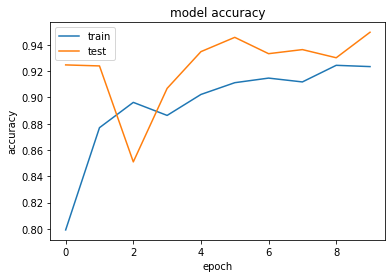

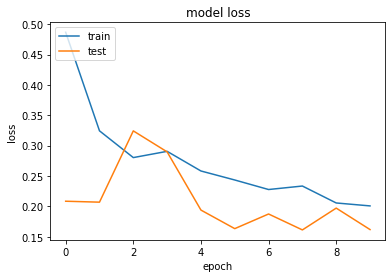

In [ ]:
plotHistory(history)

## momentum = 0.99

In [ ]:
input = layers.Input(shape = (80,80,1))
out = layers.Flatten()(input)
out = layers.Dense(4096,activation="relu")(out)
out = layers.Dense(2048,activation="relu")(out)
out = layers.Dense(1024,activation="relu")(out)
out = layers.Dense(3,activation="softmax")(out)

model= models.Model(inputs=input , outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01,momentum = 0.99),loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit(trainData,validation_data=testData,epochs=10)

Epoch 1/10
161/161 [==============================] - 158s 983ms/step - loss: 0.9150 - accuracy: 0.6342 - val_loss: 0.2786 - val_accuracy: 0.8952
Epoch 2/10
161/161 [==============================] - 157s 979ms/step - loss: 0.3930 - accuracy: 0.8566 - val_loss: 0.3035 - val_accuracy: 0.8929
Epoch 3/10
161/161 [==============================] - 157s 978ms/step - loss: 0.3649 - accuracy: 0.8750 - val_loss: 0.2110 - val_accuracy: 0.9301
Epoch 4/10
161/161 [==============================] - 158s 981ms/step - loss: 0.3963 - accuracy: 0.8663 - val_loss: 0.5288 - val_accuracy: 0.7547
Epoch 5/10
161/161 [==============================] - 159s 991ms/step - loss: 0.5292 - accuracy: 0.8063 - val_loss: 0.8407 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 157s 975ms/step - loss: 0.7637 - accuracy: 0.7051 - val_loss: 0.8340 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 156s 971ms/step - loss: 0.8319 - accuracy: 0.6688 - val_loss: 0.8376 -

In [ ]:
pred , expected = getTrueLabels(testData,model)
print(classification_report(expected,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


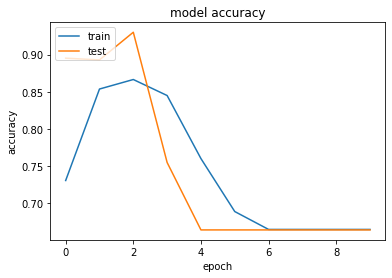

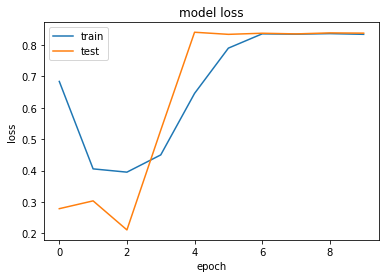

In [ ]:
plotHistory(history)


<div style="direction:rtl">
در صورتی که  momentum زیاد باشد learning rate باید مقادیر کوچک به خود بگیرد. اگر هر دو مقادیر زیادی داشته باشند باعث می شود مینیمم را با فاصله زیادی رد کند. (overshoot)
    </div>

<div style="direction:rtl">

- 0.99:

همان طور که در نمودار loss می بینیم اتفاقی که پیش تر توضیح داده شد رخ داده است.
    
 - 0.9:

epoch 7 کمترین مقدار Loss را در این 10 epoch دارد و در حالیکه در حالت بدون momentum در epoch 9 به این مقدار از loss رسیده ایم.
    
-  0.5 :

epoch 7 کمترین مقدار Loss را در این 10 epoch دارد و در حالیکه در حالت بدون momentum در epoch 9 به این مقدار از loss رسیده ایم. (بعد از epoch 7 دچار overfitting شده ایم.)

     </div>

# 7

In [ ]:
input = layers.Input(shape = (80,80,1))
out = layers.Flatten()(input)
out = layers.Dense(4096,activation="relu")(out)
out = layers.Dense(2048,activation="relu")(out)
out = layers.Dense(1024,activation="relu")(out)
out = layers.Dense(3,activation="softmax")(out)

model = models.Model(inputs=input , outputs=out)
model.compile(optimizer=optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit(trainData,validation_data=testData,epochs=20)

Epoch 1/20
161/161 [==============================] - 156s 967ms/step - loss: 3.0710 - accuracy: 0.6817 - val_loss: 0.2912 - val_accuracy: 0.8866
Epoch 2/20
161/161 [==============================] - 155s 962ms/step - loss: 0.3185 - accuracy: 0.8813 - val_loss: 0.2691 - val_accuracy: 0.8983
Epoch 3/20
161/161 [==============================] - 155s 962ms/step - loss: 0.3384 - accuracy: 0.8772 - val_loss: 0.2080 - val_accuracy: 0.9325
Epoch 4/20
161/161 [==============================] - 157s 975ms/step - loss: 0.2729 - accuracy: 0.8940 - val_loss: 0.1985 - val_accuracy: 0.9317
Epoch 5/20
161/161 [==============================] - 156s 971ms/step - loss: 0.2724 - accuracy: 0.8990 - val_loss: 0.2269 - val_accuracy: 0.9262
Epoch 6/20
161/161 [==============================] - 156s 972ms/step - loss: 0.2800 - accuracy: 0.8900 - val_loss: 0.1922 - val_accuracy: 0.9301
Epoch 7/20
161/161 [==============================] - 156s 972ms/step - loss: 0.2477 - accuracy: 0.9096 - val_loss: 0.1629 -

In [ ]:
pred , expected = getTrueLabels(testData,model)
print(classification_report(expected,pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       116
           1       0.94      0.89      0.92       317
           2       0.96      0.97      0.96       855

    accuracy                           0.95      1288
   macro avg       0.92      0.93      0.93      1288
weighted avg       0.95      0.95      0.95      1288



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


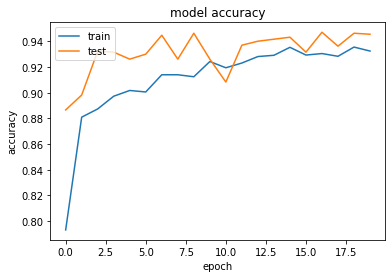

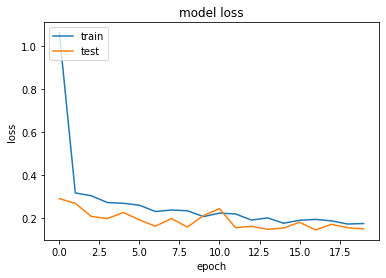

In [ ]:
plotHistory(history)

<div style="direction:rtl">

استفاده از یک epoch میتواند باعث underfitting شود.برای آپدیت کردن وزن ها لازم است چند epoch داشته باشیم تا مدل بهتر train شود. 
هنگامیکه تعداد epoch  ها افزایش یابد training model الگوهایی که مختص به داده ی نمونه است و نه مربوط به کل جمعیت را نیز یاد می گیرد و دچار overfitting  میشویم.

راهکار ها برای مقابله با overfitting :

- ساده کردن مدل با کاهش لایه ها یا نورون ها

- افزایش سایز دیتاست

Regularization : یک تکنیک برای کاهش پیچیدگی مدل است .  
مثل L1 , L2  که تابع هزینه را تغییر می دهند.   
:Dropout
هنگام آموزش در هر iteration به صورت رندوم نورون هایی را از شبکه حذف می کند.

Early stopping 

    </div>

# 8

In [ ]:
input = layers.Input(shape = (80,80,1))
out = layers.Flatten()(input)
out = layers.Dense(4096,activation="relu")(out)
out = layers.Dense(2048,activation="relu")(out)
out = layers.Dense(1024,activation="relu")(out)
out = layers.Dense(3,activation="softmax")(out)

model = models.Model(inputs=input , outputs=out)
model.compile(optimizer=optimizers.Adam(),loss="MSE",metrics=['accuracy'])
history = model.fit(trainData,validation_data=testData,epochs=20)

Epoch 1/20
161/161 [==============================] - 160s 994ms/step - loss: 0.2241 - accuracy: 0.6638 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 2/20
161/161 [==============================] - 159s 991ms/step - loss: 0.2248 - accuracy: 0.6629 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 3/20
161/161 [==============================] - 159s 990ms/step - loss: 0.2267 - accuracy: 0.6600 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 4/20
161/161 [==============================] - 160s 992ms/step - loss: 0.2204 - accuracy: 0.6694 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 5/20
161/161 [==============================] - 160s 992ms/step - loss: 0.2295 - accuracy: 0.6558 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 6/20
161/161 [==============================] - 160s 994ms/step - loss: 0.2303 - accuracy: 0.6546 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 7/20
161/161 [==============================] - 165s 1s/step - loss: 0.2201 - accuracy: 0.6698 - val_loss: 0.2241 - va

In [ ]:
pred , expected = getTrueLabels(testData,model)
print(classification_report(expected,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


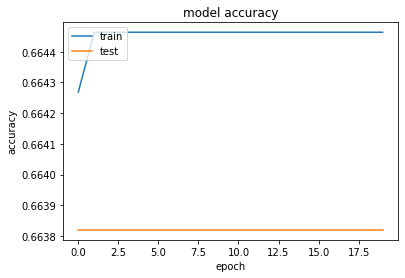

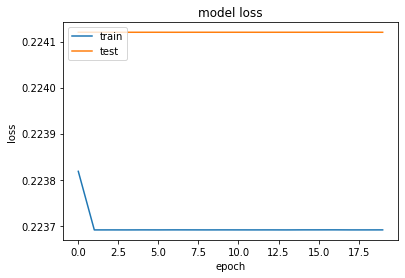

In [ ]:
plotHistory(history)

<div style="direction:rtl">
مقدار loss  با MSE حدود 0.22  در داده آموزشی است و در داده تست مقدار ثابت 0.2241 را دارد. تمامی داده های تست را عضو کلاس 2 پیش بینی کرده است. 
دقت در تست مقدار ثابت 66.38% است.(به طور کلی دقت و loss تقریبا ثابت می مانند.)در حالیکه در categorical cross entropy  در داده آموزشی دقت به طور کلی افزایش(از 68 درصد به 93 درصد می رسد) و loss کاهش می یابد.(از 3 به حدود 0.16 می رسد) و در داده تست هم از دقت حدود 88 درصد به 94 درصد می رسد.

  برای linear regression  مناسب است.
</div>

# 9

## II

In [ ]:
input = layers.Input(shape = (80,80,1))
out = layers.Flatten()(input)
out = layers.Dense(4096,activation="relu",kernel_regularizer=regularizers.l2(0.0001))(out)
out = layers.Dense(2048,activation="relu",kernel_regularizer=regularizers.l2(0.0001))(out)
out = layers.Dense(1024,activation="relu",kernel_regularizer=regularizers.l2(0.0001))(out)
out = layers.Dense(3,activation="softmax",kernel_regularizer=regularizers.l2(0.0001))(out)

model = models.Model(inputs=input , outputs=out)
model.compile(optimizer=optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit(trainData,validation_data=testData,epochs=20)


Epoch 1/20
161/161 [==============================] - 167s 1s/step - loss: 3.4249 - accuracy: 0.6431 - val_loss: 0.8124 - val_accuracy: 0.8556
Epoch 2/20
161/161 [==============================] - 166s 1s/step - loss: 0.7568 - accuracy: 0.8836 - val_loss: 0.5695 - val_accuracy: 0.9255
Epoch 3/20
161/161 [==============================] - 165s 1s/step - loss: 0.6225 - accuracy: 0.8988 - val_loss: 0.5138 - val_accuracy: 0.9177
Epoch 4/20
161/161 [==============================] - 165s 1s/step - loss: 0.5653 - accuracy: 0.8953 - val_loss: 0.4450 - val_accuracy: 0.9301
Epoch 5/20
161/161 [==============================] - 165s 1s/step - loss: 0.4825 - accuracy: 0.9026 - val_loss: 0.4243 - val_accuracy: 0.9224
Epoch 6/20
161/161 [==============================] - 165s 1s/step - loss: 0.4404 - accuracy: 0.9052 - val_loss: 0.3385 - val_accuracy: 0.9425
Epoch 7/20
161/161 [==============================] - 165s 1s/step - loss: 0.4145 - accuracy: 0.9034 - val_loss: 0.3247 - val_accuracy: 0.9363

In [ ]:
pred , expected = getTrueLabels(testData,model)
print(classification_report(expected,pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       116
           1       0.93      0.90      0.92       317
           2       0.96      0.96      0.96       855

    accuracy                           0.95      1288
   macro avg       0.92      0.95      0.93      1288
weighted avg       0.95      0.95      0.95      1288



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


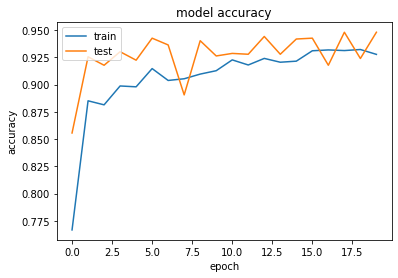

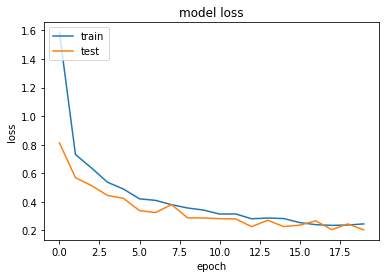

In [ ]:
plotHistory(history)

<div style="direction:rtl">
مقدار loss تا epoch 12 بیش از 0.3 است .L2 یک پنالتی برای اندازه وزن در نظر می گیرد یعنی هر چه وزن ها بیشتر باشند مقدار loss بیشتر است .و این مدل را وادار می کند که وزن کوچکتری داشته باشد.و مدل ساده تر می شود.همچنین وزن های زیاد باعث می شوند که تغییر کوچکی در ورودی منجر تغییر زیادی در خروجی شوند(در اینجا نسبت به 7 که از L2 استفاده نکرده بودیم در loss قله و دره های ملایم تری داریم!)
    </div>

## III

In [12]:
input = layers.Input(shape = (80,80,1))
out = layers.Flatten()(input)
out = layers.Dense(4096,activation="relu")(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense(2048,activation="relu")(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense(1024,activation="relu")(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense(3,activation="softmax")(out)

model = models.Model(inputs=input , outputs=out)
model.compile(optimizer=optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit(trainData,validation_data=testData,epochs=20)


Epoch 1/20
161/161 [==============================] - 170s 1s/step - loss: 3.2054 - accuracy: 0.6770 - val_loss: 0.2656 - val_accuracy: 0.9092
Epoch 2/20
161/161 [==============================] - 169s 1s/step - loss: 0.3691 - accuracy: 0.8498 - val_loss: 0.3113 - val_accuracy: 0.8944
Epoch 3/20
161/161 [==============================] - 169s 1s/step - loss: 0.3139 - accuracy: 0.8816 - val_loss: 0.2931 - val_accuracy: 0.8851
Epoch 4/20
161/161 [==============================] - 170s 1s/step - loss: 0.2995 - accuracy: 0.8878 - val_loss: 0.3261 - val_accuracy: 0.8804
Epoch 5/20
161/161 [==============================] - 169s 1s/step - loss: 0.2820 - accuracy: 0.8933 - val_loss: 0.2283 - val_accuracy: 0.9154
Epoch 6/20
161/161 [==============================] - 161s 1s/step - loss: 0.2775 - accuracy: 0.8952 - val_loss: 0.1940 - val_accuracy: 0.9216
Epoch 7/20
161/161 [==============================] - 164s 1s/step - loss: 0.2581 - accuracy: 0.9042 - val_loss: 0.1997 - val_accuracy: 0.9317

In [13]:
pred , expected = getTrueLabels(testData,model)
print(classification_report(expected,pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       116
           1       0.85      0.94      0.89       317
           2       0.97      0.94      0.96       855

    accuracy                           0.94      1288
   macro avg       0.93      0.92      0.92      1288
weighted avg       0.94      0.94      0.94      1288



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


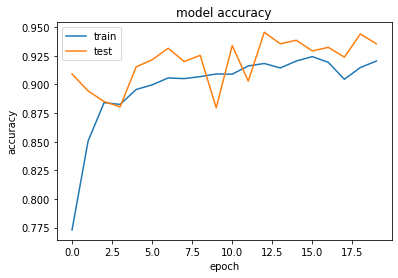

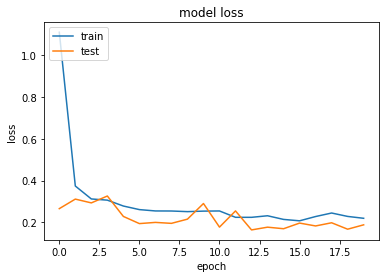

In [14]:
plotHistory(history)